In [1]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

from emulator_utils import brewer2_light

%load_ext autoreload
%autoreload 2

In [4]:
def plot_ensemble_error(NRMSE_ens, scenarios, method, train, save=False, figname=None):

  fig, ax = plt.subplots(figsize=(8,8),layout='constrained')
  xaxis = np.arange(1,5_001,5_001//50)

  for i, scen in enumerate(scenarios):
    if method == 'Method 2: FDT':
      ax.semilogy(xaxis, NRMSE_ens[scen], lw=2, c=emulator_utils.brewer2_light(i), label=scen)
      continue
    if train == scen:
      continue
    ax.semilogy(xaxis, NRMSE_ens[train][scen], lw=2, c=emulator_utils.brewer2_light(i), label=scen)

  ax.set_ylabel(r'NRMSE [\%]',fontsize=22)
  ax.set_xlabel('No. Ensemble Members',fontsize=22)
  ax.set_title(f'Error vs. Ensemble Size, {method}',fontsize=24)
  ax.tick_params(axis='both', which='major', labelsize=18)
  ax.legend(fontsize=20)
  ax.grid()

  if save:
    plt.savefig(f'Figures/exp4_ensemble_{figname}_presentation.pdf',dpi=900)

  return

scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']

In [23]:
def plot_ensemble_error_multi(NRMSE_all, scenarios, methods, train, save=False, figname=None):

  fig, ax = plt.subplots(3,2,figsize=(14,8),sharex=True,sharey='row',layout='constrained')
  xaxis = np.arange(1,5_001,5_001//50)

  for i, ax in enumerate(ax.flat):
    NRMSE_ens = NRMSE_all[i]
    method = methods[i]
    for j, scen in enumerate(scenarios):
      if method == 'Method 2: FDT':
        ax.semilogy(xaxis, NRMSE_ens[scen], lw=2, c=emulator_utils.brewer2_light(j), label=scen)
        continue
      if train == scen:
        continue
      ax.semilogy(xaxis, NRMSE_ens[train][scen], lw=2, c=emulator_utils.brewer2_light(j), label=scen)

    ax.set_title(f'{method}',fontsize=18)
    ax.grid()

    if i == 0 or i == 1:
      ax.legend(fontsize=12)

  ax.tick_params(axis='both', which='major', labelsize=18)

  fig.supylabel(r'NRMSE [\%]',fontsize=24)
  fig.supxlabel('No. Ensemble Members',fontsize=24)
  fig.suptitle(f'NRMSE vs. Ensemble Size by Method, Train = {train}',fontsize=24)

  if save:
    plt.savefig(f'Figures/exp4_ensemble_{figname}.pdf',dpi=900)

  return

scenarios = ['Abrupt','High Emissions','Mid. Emissions','Overshoot']

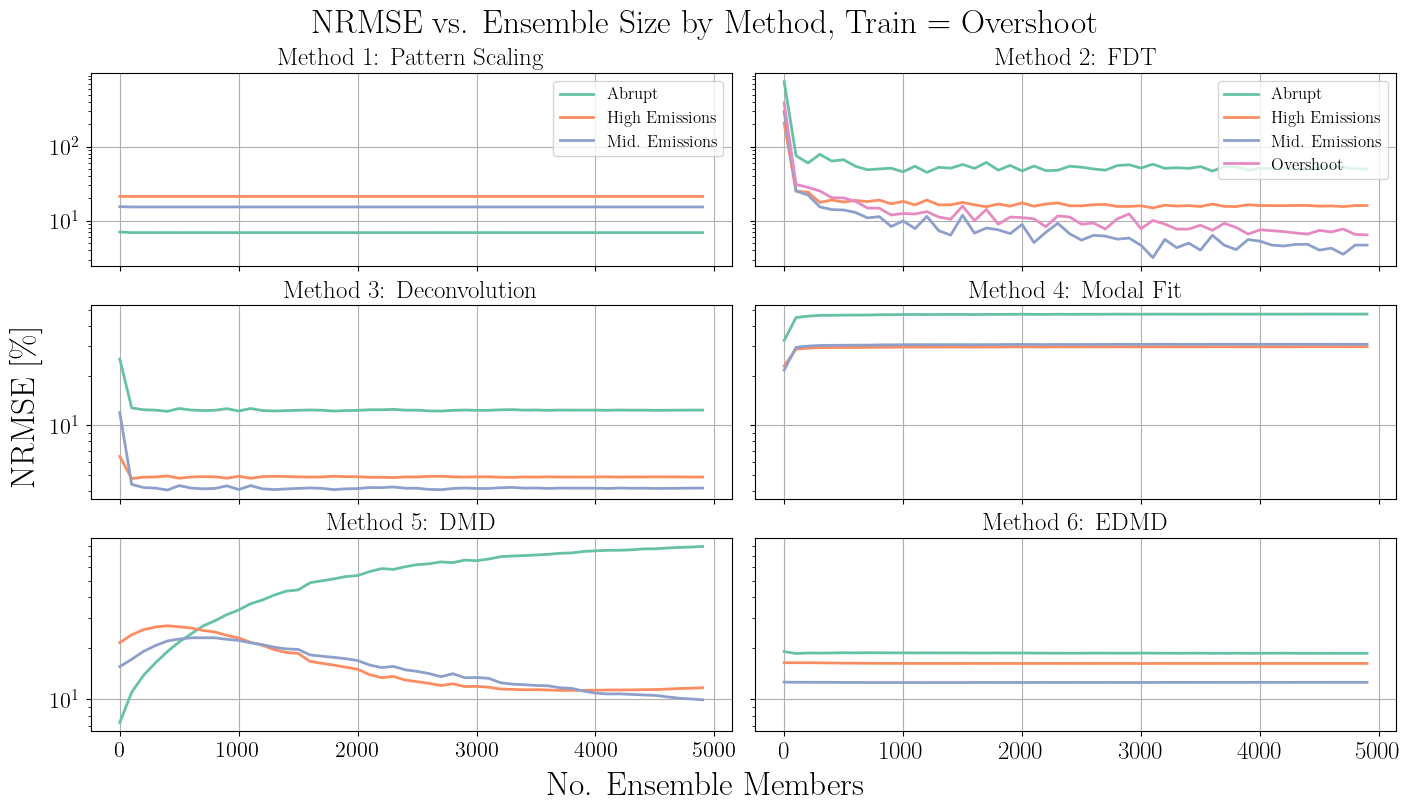

In [24]:
NRMSE_all = [NRMSE_all_PS,NRMSE_all_FDT,NRMSE_all_deconv,NRMSE_all_fit,NRMSE_all_DMD,NRMSE_all_EDMD]
methods = ['Method 1: Pattern Scaling','Method 2: FDT', 'Method 3: Deconvolution',
           'Method 4: Modal Fit', 'Method 5: DMD', 'Method 6: EDMD']
train = 'Overshoot'
plot_ensemble_error_multi(NRMSE_all, scenarios, methods, train, save=True, figname='all')

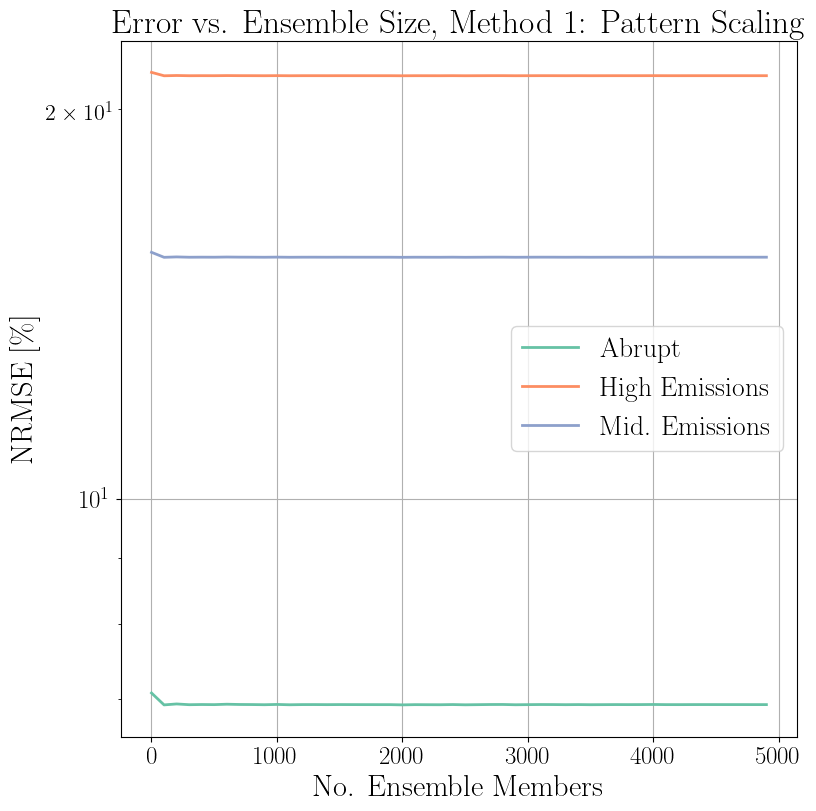

In [16]:
NRMSE_all_PS = emulator_utils.open_error('exp4b_1_PS_error_ensemble')
plot_ensemble_error(NRMSE_all_PS, scenarios, 'Method 1: Pattern Scaling', 'Overshoot', save=False, figname='PS')

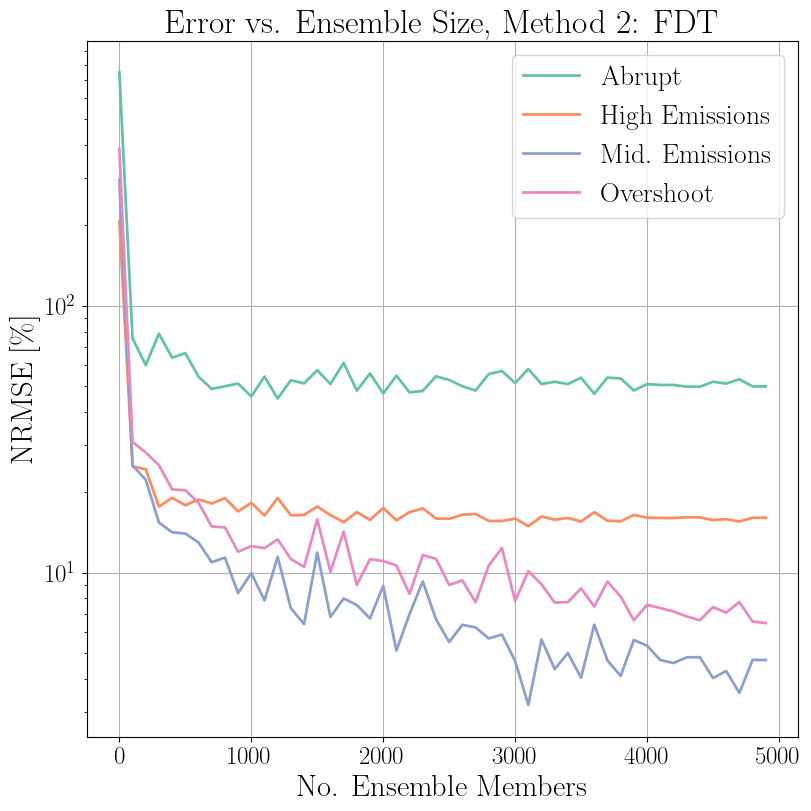

In [7]:
NRMSE_all_FDT = emulator_utils.open_error('exp4b_2_FDT_error_ensemble')
plot_ensemble_error(NRMSE_all_FDT, scenarios, 'Method 2: FDT', 'Abrupt', save=True, figname='FDT')

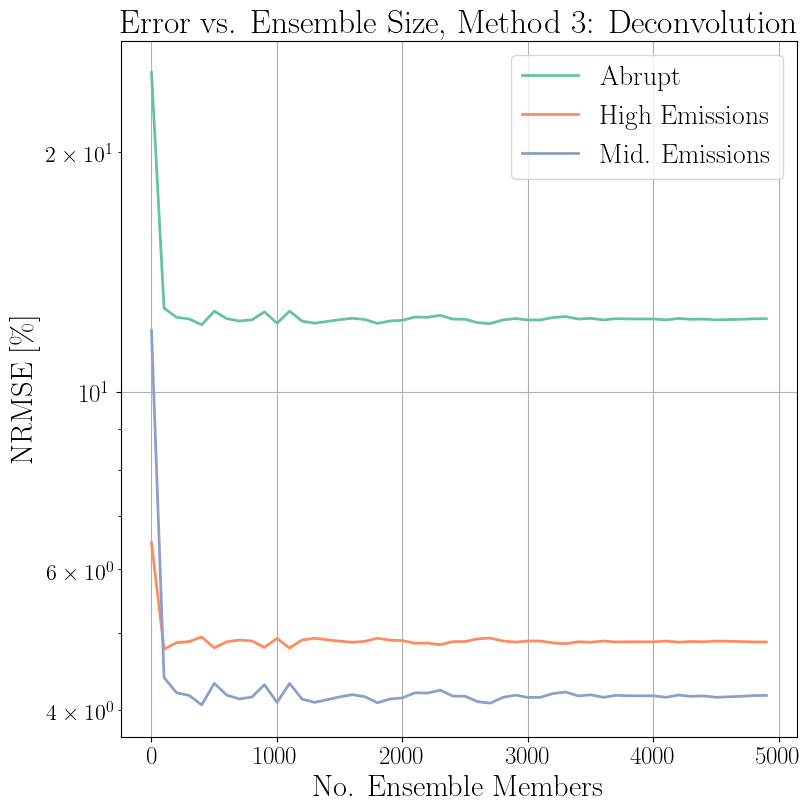

In [15]:
NRMSE_all_deconv = emulator_utils.open_error('exp4b_3_deconv_error_ensemble')
plot_ensemble_error(NRMSE_all_deconv, scenarios, 'Method 3: Deconvolution', 'Overshoot', save=False, figname='deconv')

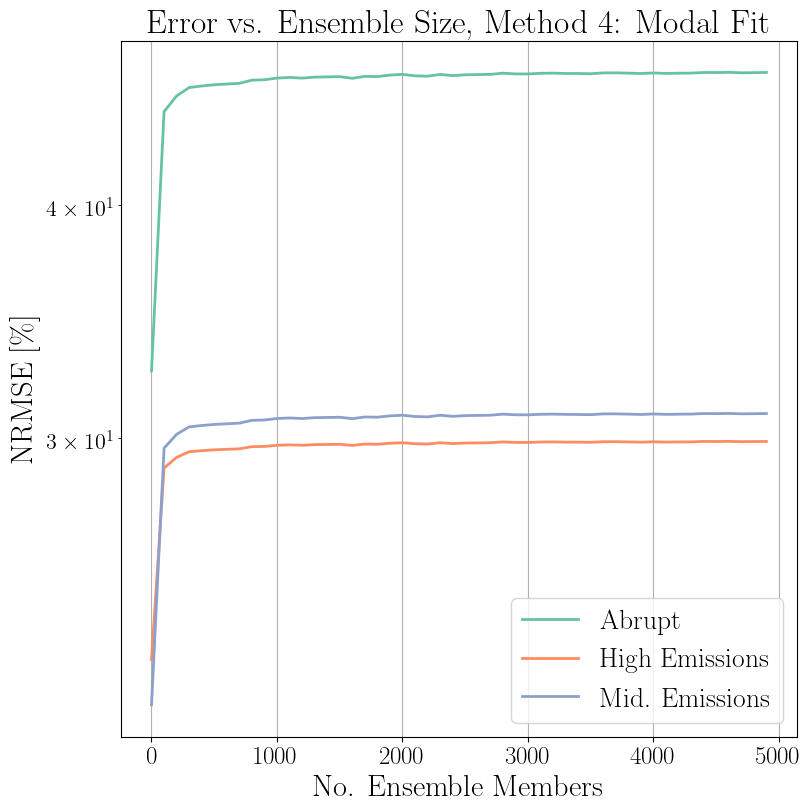

In [14]:
NRMSE_all_fit = emulator_utils.open_error('exp4b_4_fit_error_ensemble')
plot_ensemble_error(NRMSE_all_fit, scenarios, 'Method 4: Modal Fit', 'Overshoot', save=False, figname='fit')

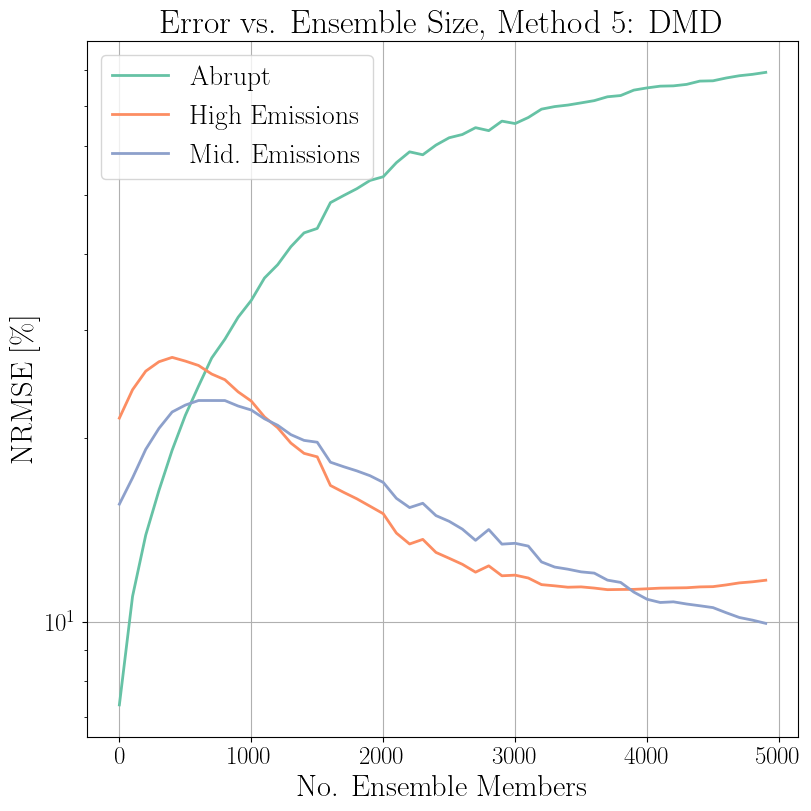

In [12]:
NRMSE_all_DMD = emulator_utils.open_error('exp4b_5_DMD_error_ensemble')
plot_ensemble_error(NRMSE_all_DMD, scenarios, 'Method 5: DMD', 'Overshoot', save=False, figname='DMD')

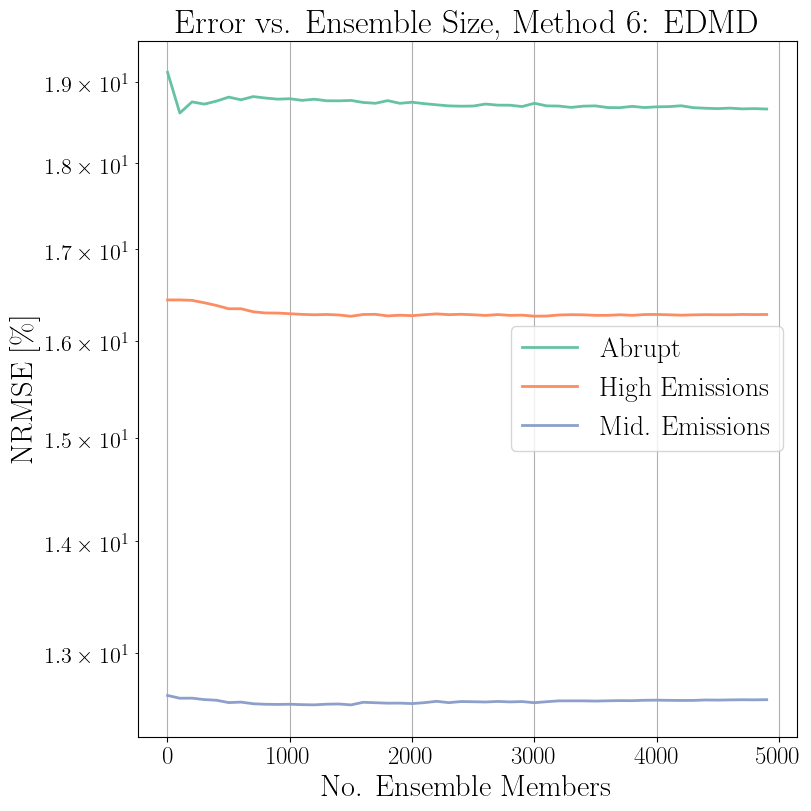

In [13]:
NRMSE_all_EDMD = emulator_utils.open_error('exp4b_6_EDMD_error_ensemble')
plot_ensemble_error(NRMSE_all_EDMD, scenarios, 'Method 6: EDMD', 'Overshoot', save=False, figname='EDMD')